In [19]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns



In [20]:
df = pd.read_csv('https://raw.githubusercontent.com/ArunKumar237/datasets/main/adult.zip')

In [21]:
#replacing '?' with nan
df[df == '?'] = np.nan

In [22]:
df.drop_duplicates(inplace=True)

In [23]:
# filling null values
for col in ['workclass', 'occupation', 'country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [24]:
df['salary'] = df['salary'].str.replace('<=50K', '0')
df['salary'] = df['salary'].str.replace('>50K', '1')
df['salary'] = df['salary'].astype('int')

<AxesSubplot: xlabel='salary', ylabel='count'>

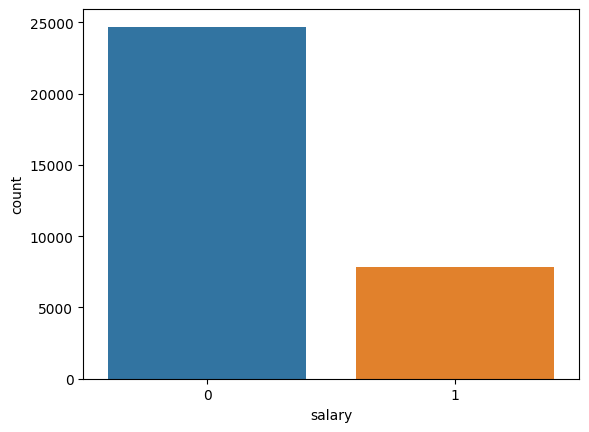

In [25]:
sns.countplot(x = df['salary'])

In [26]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 

df_majority = df[(df['salary']==0)] 
df_minority = df[(df['salary']==1)] 

# upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,    # sample with replacement
                                 n_samples= df['salary'].value_counts().max(), # to match majority class
                                 random_state=42,
                                 )  # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

<AxesSubplot: xlabel='salary', ylabel='count'>

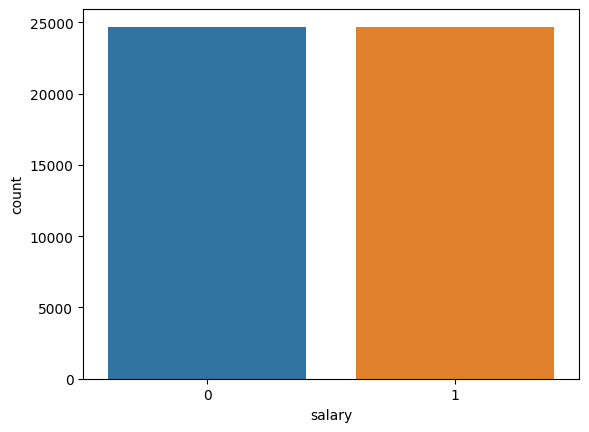

In [27]:
sns.countplot(x = df_upsampled['salary'])

In [28]:
categorical = []
for i in df_upsampled.columns:
    if df_upsampled[i].dtype == 'O' and i != 'salary':
        categorical.append(i)

print(categorical)

['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'country']


In [29]:
for i in df_upsampled.columns:
    if df_upsampled[i].dtype != 'O':
        print('-',i)

- age
- fnlwgt
- education-num
- capital-gain
- capital-loss
- hours-per-week
- salary


In [30]:
from sklearn.impute import SimpleImputer
impute = SimpleImputer(strategy='most_frequent')

data = impute.fit_transform(df_upsampled)
data = pd.DataFrame(df_upsampled, columns=impute.feature_names_in_)

In [31]:
from sklearn.preprocessing import  OrdinalEncoder
binary_enc = OrdinalEncoder()
data[categorical] = binary_enc.fit_transform(data[categorical])

In [32]:
X = data.drop(['salary'], axis=1)
y = data['salary']

In [33]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country
30325,61,4.0,81132,4.0,3,2.0,6.0,0.0,1.0,1.0,7298,0,40,30.0
31604,52,4.0,146767,11.0,9,2.0,7.0,0.0,4.0,1.0,0,0,40,39.0
3466,39,4.0,96452,12.0,14,2.0,4.0,0.0,4.0,1.0,0,0,55,39.0
22592,48,5.0,382242,10.0,16,2.0,4.0,5.0,4.0,0.0,0,0,40,39.0
21927,30,4.0,89625,15.0,10,2.0,10.0,5.0,1.0,0.0,0,0,5,39.0


In [47]:
y.head()

30325    1
31604    1
3466     1
22592    1
21927    1
Name: salary, dtype: int32

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify=data['salary'])

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49396 entries, 30325 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             49396 non-null  int64  
 1   workclass       49396 non-null  float64
 2   fnlwgt          49396 non-null  int64  
 3   education       49396 non-null  float64
 4   education-num   49396 non-null  int64  
 5   marital-status  49396 non-null  float64
 6   occupation      49396 non-null  float64
 7   relationship    49396 non-null  float64
 8   race            49396 non-null  float64
 9   sex             49396 non-null  float64
 10  capital-gain    49396 non-null  int64  
 11  capital-loss    49396 non-null  int64  
 12  hours-per-week  49396 non-null  int64  
 13  country         49396 non-null  float64
 14  salary          49396 non-null  int32  
dtypes: float64(8), int32(1), int64(6)
memory usage: 5.8 MB


In [50]:
#feature scaling

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [51]:
X_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country
0,0.808781,-1.325160,-0.354189,-0.409727,0.922533,-0.319271,-1.374319,-0.735768,0.366329,0.607175,-0.193738,-0.263223,-0.174683,0.284119
1,-0.193823,0.058913,-0.770036,0.148547,-0.606419,-0.319271,-0.660134,-0.735768,0.366329,0.607175,-0.193738,-0.263223,-0.174683,0.284119
2,-0.425193,0.058913,-0.768327,0.148547,-0.606419,1.922298,0.054051,1.703171,0.366329,0.607175,-0.193738,-0.263223,-0.174683,0.284119
3,0.268917,1.442986,2.003709,0.427684,1.304771,-0.319271,-0.660134,2.312906,0.366329,-1.646971,-0.193738,3.650270,1.476185,0.284119
4,-0.348070,0.058913,-0.563246,-0.409727,0.922533,-0.319271,0.768236,2.312906,-3.307431,-1.646971,-0.193738,-0.263223,-0.587400,-0.867867


In [52]:
#PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
pca.explained_variance_ratio_

array([0.15754188, 0.09527604, 0.08882118, 0.08114097, 0.07524313,
       0.07431842, 0.06877189, 0.06553516, 0.06217937, 0.05912504,
       0.05606788, 0.04815146, 0.04524917, 0.02257842])

In [53]:
pca.explained_variance_ratio_

array([0.15754188, 0.09527604, 0.08882118, 0.08114097, 0.07524313,
       0.07431842, 0.06877189, 0.06553516, 0.06217937, 0.05912504,
       0.05606788, 0.04815146, 0.04524917, 0.02257842])

In [54]:
round(sum(list(pca.explained_variance_ratio_[:13]))*100)

98

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier(max_depth= 10, max_features= 1.0, max_samples= 0.5, n_estimators= 100)

In [43]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, max_features=1.0, max_samples=0.5)

In [74]:
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

              precision    recall  f1-score   support

           0       0.94      0.84      0.88     19758
           1       0.85      0.94      0.90     19758

    accuracy                           0.89     39516
   macro avg       0.90      0.89      0.89     39516
weighted avg       0.90      0.89      0.89     39516



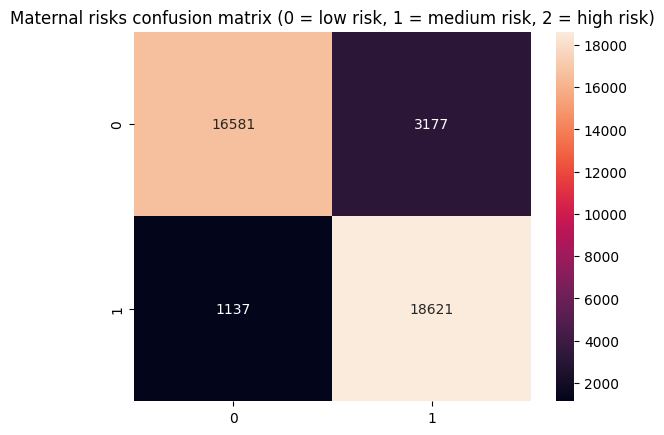

In [73]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
cm = confusion_matrix(y_train, y_pred)
sns.heatmap(cm, annot=True, fmt='d').set_title('Maternal risks confusion matrix (0 = low risk, 1 = medium risk, 2 = high risk)')

print(classification_report(y_train,y_pred))


              precision    recall  f1-score   support

           0       0.38      0.54      0.45      4940
           1       0.21      0.12      0.16      4940

    accuracy                           0.33      9880
   macro avg       0.30      0.33      0.30      9880
weighted avg       0.30      0.33      0.30      9880



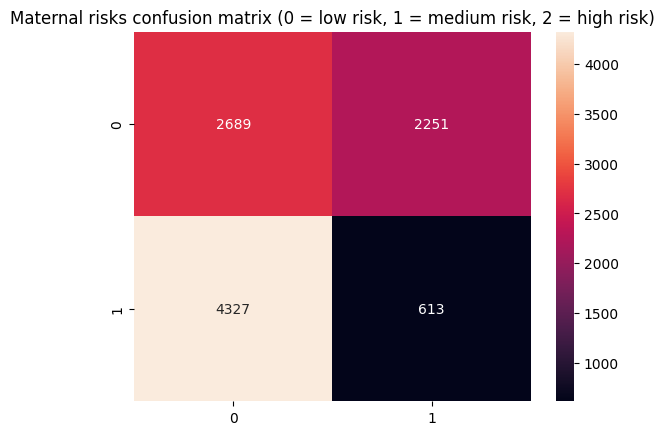

In [77]:
cm = confusion_matrix(y_test, y_testp)
sns.heatmap(cm, annot=True, fmt='d').set_title('Maternal risks confusion matrix (0 = low risk, 1 = medium risk, 2 = high risk)')

print(classification_report(y_test,y_pred_test))

In [78]:
f1_score(y_pred=y_pred_train, y_true=y_train, average='weighted')

0.8905373016553293

In [79]:
f1_score(y_pred=y_pred_test, y_true=y_test, average='weighted')

0.3034574577997335

In [81]:
accuracy_score(y_pred=y_pred_train, y_true=y_train)

0.8908290312784695

In [83]:
accuracy_score(y_pred=y_pred_test, y_true=y_test)

0.33421052631578946

In [84]:
(89+33)/200

0.61

In [86]:
model_accuracy = (2 * (89 * 33)) / (89 + 33)
diff_test_train_acc = abs(33 - 89)

In [87]:
model_accuracy

48.14754098360656

In [88]:
diff_test_train_acc

56